In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [39]:
class PlotData:
    def __init__(self,directory):
        self.directory = directory
        
        data = []
        for fileName in os.listdir(directory):
            if '.pkl' not in fileName: continue
            with open(directory+fileName, "rb") as file:
                loaded_dict = pickle.load(file)   
            data.append(loaded_dict)

        df = pd.DataFrame(data)
        params = pd.DataFrame(df['params'].to_list(),columns=['Param 1','Param 2','Param 3','Param 4'])
        grads = pd.DataFrame(df['grads'].to_list(),columns=['Grad 1','Grad 2','Grad 3','Grad 4'])
        self.df = pd.concat([df,params,grads],axis=1)
        self.df.drop(columns=['params','grads'],inplace=True)
        
    def plotRewardPerEpoch(self):
        sns.lineplot(x='epoch',y='reward',data=self.df)
        plt.title("Reward vs Epoch")
        plt.show()
    
    def plotParamsPerEpoch(self):
        sns.lineplot(x='epoch',y='Param 1',data=self.df)
        plt.title("ky vs Epoch")
        plt.ylabel("ky")
        plt.show()

        sns.lineplot(x='epoch',y='Param 2',data=self.df)
        plt.title("kx vs Epoch")
        plt.ylabel("kx")
        plt.show()

        sns.lineplot(x='epoch',y='Param 3',data=self.df)
        plt.title("abs_pitch_delta vs Epoch")
        plt.ylabel("abs_pitch_delta")
        plt.show()

        sns.lineplot(x='epoch',y='Param 4',data=self.df)
        plt.title("abs_thrust_delta vs Epoch")
        plt.ylabel("abs_thrust_delta")
        plt.show()    
        
    def plotParamsPerReward(self):
        sns.lineplot(x='Param 1', y='reward' ,data=self.df)
        plt.title("ky vs Reward")
        plt.ylabel("Reward")
        plt.show()

        sns.lineplot(x='Param 2',y='reward' ,data=self.df)
        plt.title("kx vs Reward")
        plt.ylabel("Reward")
        plt.show()

        sns.lineplot(x ='Param 3',y='reward' ,data=self.df)
        plt.title("abs_pitch_delta vs Reward")
        plt.ylabel("Reward")
        plt.show()

        sns.lineplot(x = 'Param 4',y='reward' ,data=self.df)
        plt.title("abs_thrust_delta vs Reward")
        plt.ylabel("Reward")
        plt.show()  
        
        
    
def plotRewardPerEpoch(directory):
       
    ##Grads
    
    sns.lineplot(x='epoch',y='Grad 1',data=df)
    plt.title("Grad of ky vs Epoch")
    plt.ylabel("Grad of ky")
    plt.show()
    
    sns.lineplot(x='epoch',y='Grad 2',data=df)
    plt.title("Grad of kx vs Epoch")
    plt.ylabel("Grad of kx")
    plt.show()
    
    sns.lineplot(x='epoch',y='Grad 3',data=df)
    plt.title("Grad of abs_pitch_delta vs Epoch")
    plt.ylabel("Grad of abs_pitch_delta")
    plt.show()
    
    sns.sca(x='epoch',y='Grad 4',data=df)
    plt.title("Grad of abs_thrust_delta vs Epoch")
    plt.ylabel("Grad of abs_thrust_delta")
    plt.show()
    
    
    

# Experiment 1


**Reward function:**<br>
- For reaching target +2
- Based on euclidien distance if drone moves closer to the target from the last step receives +1
- Other cases -1

**Optimizer:**
<p>Simple gradient ascent</p>

In [43]:
exp1 = PlotData('weights/run_2023-01-05_15-04-25/')

### Plotting Reward vs Epoch

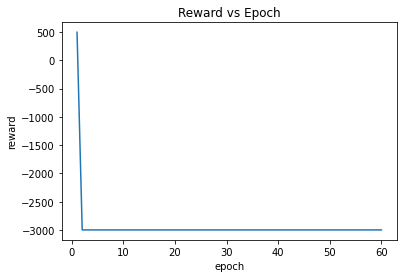

In [44]:
exp1.plotRewardPerEpoch()

### Plotting changes in the parameters per epoch

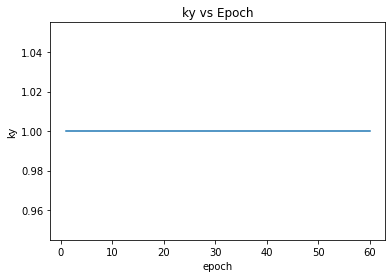

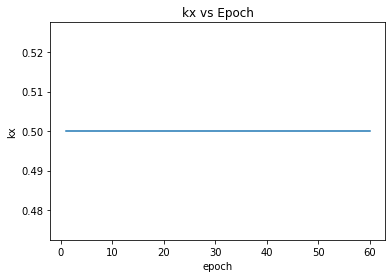

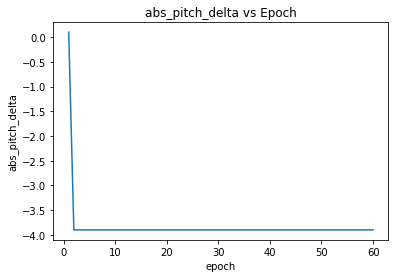

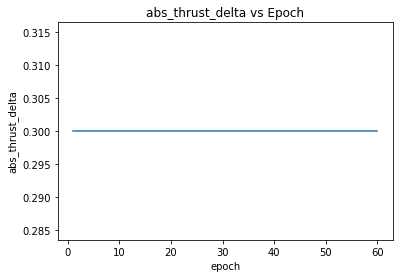

In [45]:
exp1.plotParamsPerEpoch()

### Plotting chnages in the Reward per chnage parameters

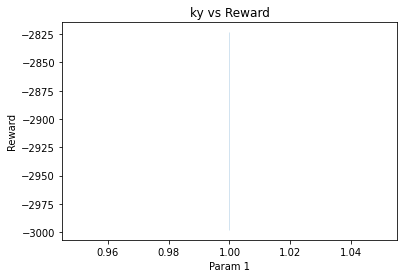

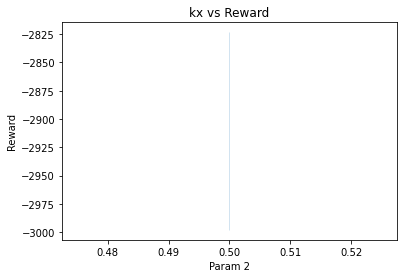

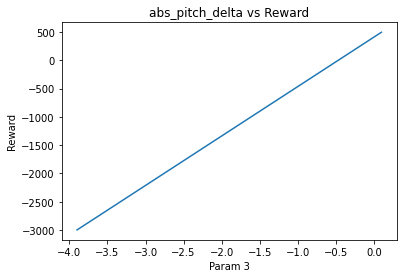

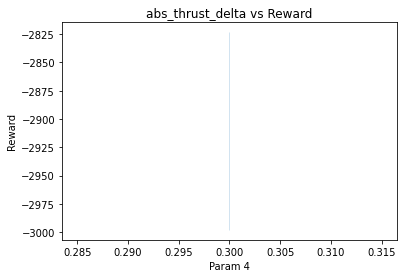

In [46]:
exp1.plotParamsPerReward()

# Experiment 2


**Reward function:**<br>
- For reaching target +2
- Based on euclidien distance if drone moves closer to the target from the last step receives +1
- Other cases -1

**Optimizer:**
<p>Adam optimizer with gradient ascent</p>

In [40]:
exp2 = PlotData('weights/run_2023-01-05_18-36-08/')

### Plotting Reward vs Epoch

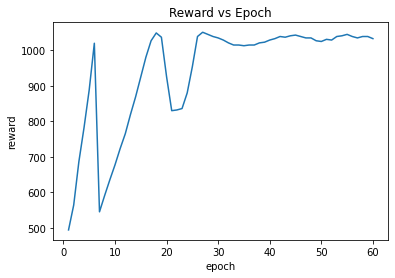

In [41]:
exp2.plotRewardPerEpoch()

### Plotting changes in the parameters per epoch

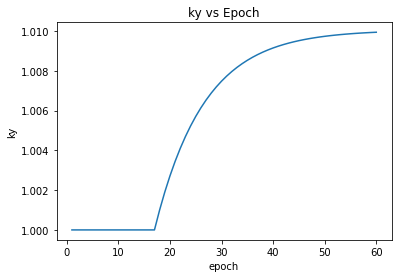

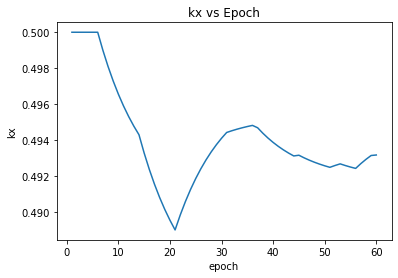

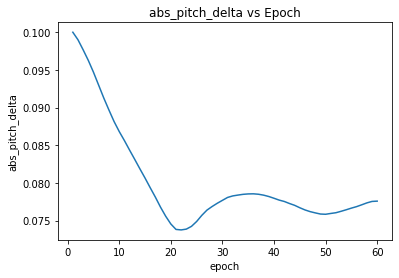

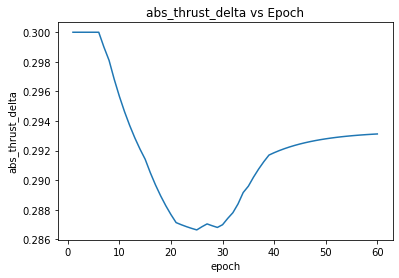

In [33]:
exp1.plotParamsPerEpoch()

### Plotting chnages in the Reward per chnage parameters

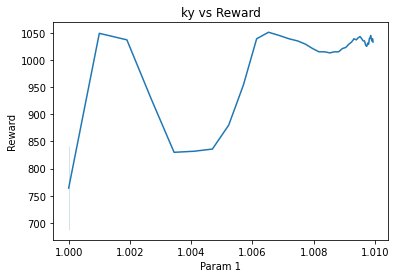

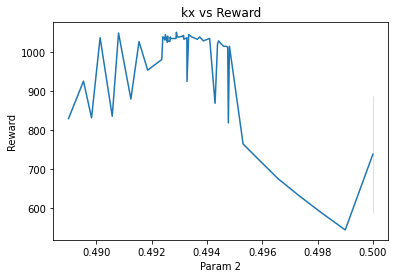

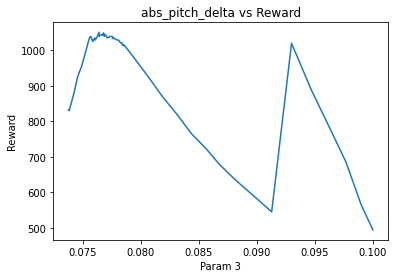

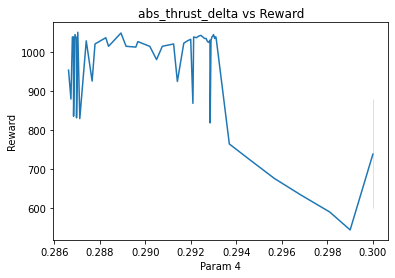

In [42]:
exp2.plotParamsPerReward()